# Heart Attack Prediction Using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve,confusion_matrix
import scikitplot as skplt

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Here output of 0 signifies that a person has low chances of heart attack while 1 suggests that the person has higher chances of heart attack


In [4]:
data.shape

(303, 14)

In [5]:
data[['age', 'trtbps', 'chol', 'thalachh']].describe()

,age,trtbps,chol,thalachh
count,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865
std,9.082101,17.538143,51.830751,22.905161
min,29.000000,94.000000,126.000000,71.000000
25%,47.500000,120.000000,211.000000,133.500000
50%,55.000000,130.000000,240.000000,153.000000
75%,61.000000,140.000000,274.500000,166.000000
max,77.000000,200.000000,564.000000,202.000000


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

We have no missing values in the dataset

##  Exploratory Data Analysis

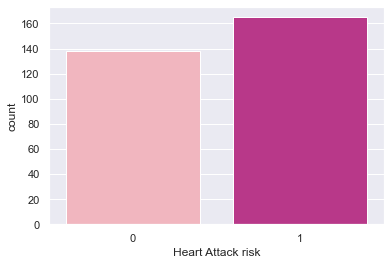

In [7]:
sns.countplot(x = data['output'], palette= 'RdPu')
plt.xlabel('Heart Attack risk');

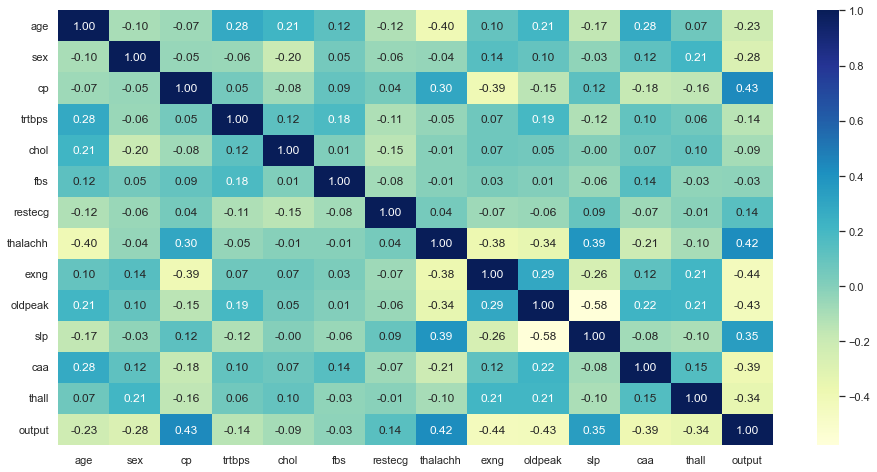

In [8]:
plt.figure(figsize= (16, 8))
sns.heatmap(data.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

Our target variable seems to be correlated with 'cp' (chest pain type), 'thalachh' (max heart rate achieved), 'exng' (exercise induced angina), 'oldpeak' (previous peak), 'slp' (slope), 'caa' (number of major vessels), 'thall' (Thalium stress test results)

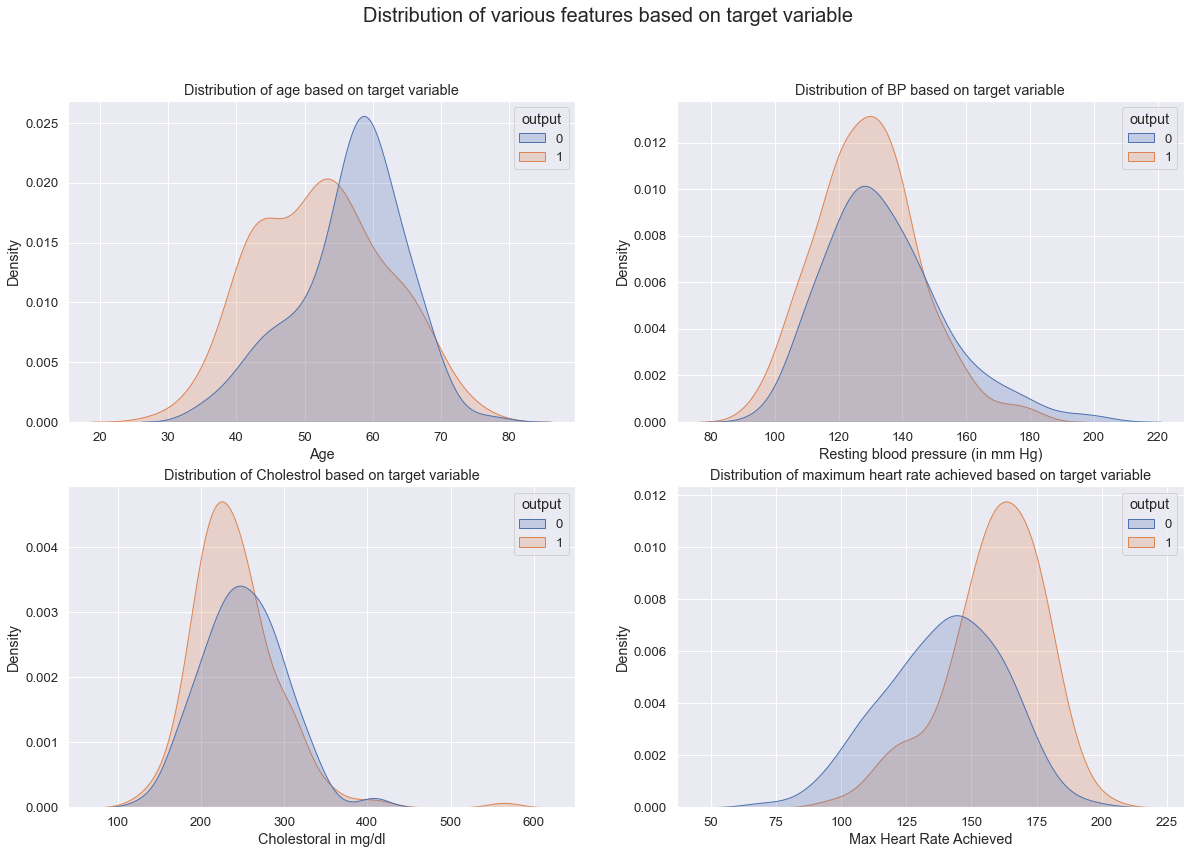

In [9]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 13))

plt.suptitle('Distribution of various features based on target variable', fontsize = 20)

ax1 = sns.kdeplot(x ='age', data= data, hue= 'output', shade= True, ax= ax[0, 0])
ax1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

ax2 = sns.kdeplot(x ='trtbps', data= data, hue= 'output', shade= True, ax= ax[0, 1])
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on target variable')

ax3 = sns.kdeplot(x ='chol', data= data, hue= 'output', shade= True, ax= ax[1, 0])
ax3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on target variable')

ax4 = sns.kdeplot(x ='thalachh', data= data, hue= 'output', shade= True, ax= ax[1, 1])
ax4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on target variable')

plt.show()

We can spot a pattern in the distribution of maximum heart rate achieved. Those who have reached high values of maximum heart rate are likely to have a heart attack

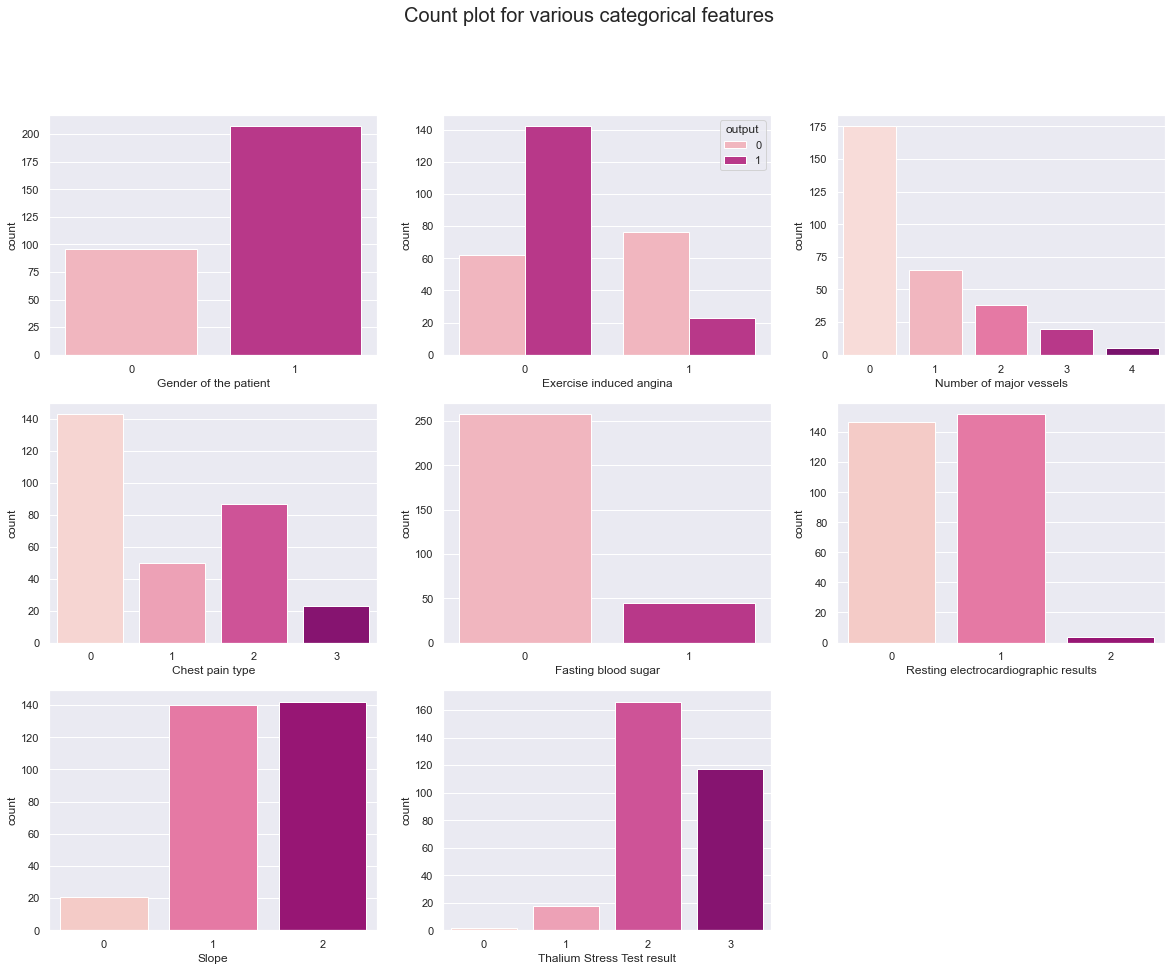

In [10]:
sns.set_context('notebook', font_scale= 1)
fig, ax = plt.subplots(3, 3, figsize = (20, 15))
ax[2, 2].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 20)

ax1 = sns.countplot(x ='sex', data= data, ax= ax[0, 0], palette= 'RdPu')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='exng', data= data, hue= 'output', ax= ax[0, 1], palette= 'RdPu')
ax2.set(xlabel = 'Exercise induced angina')

ax3 = sns.countplot(x ='caa', data= data, ax= ax[0, 2], palette= 'RdPu')
ax3.set(xlabel = 'Number of major vessels')

ax4 = sns.countplot(x ='cp', data= data, ax= ax[1, 0], palette= 'RdPu')
ax4.set(xlabel = 'Chest pain type')

ax5 = sns.countplot(x ='fbs', data= data, ax= ax[1, 1], palette= 'RdPu')
ax5.set(xlabel = 'Fasting blood sugar')

ax6 = sns.countplot(x ='restecg', data= data, ax= ax[1, 2], palette= 'RdPu')
ax6.set(xlabel = 'Resting electrocardiographic results')

ax7 = sns.countplot(x ='slp', data= data, ax= ax[2, 0], palette= 'RdPu')
ax7.set(xlabel = 'Slope')

ax8 = sns.countplot(x ='thall', data= data, ax= ax[2, 1], palette= 'RdPu')
ax8.set(xlabel = 'Thalium Stress Test result')

plt.show()

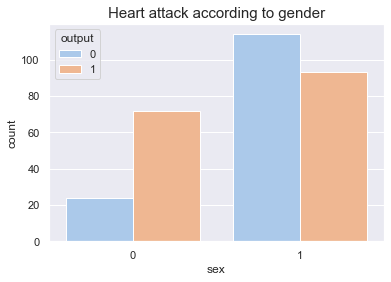

In [11]:
sns.countplot(x = 'sex', data= data, hue= 'output', palette= 'pastel')
plt.title('Heart attack according to gender', fontsize = 15);

We can see from this countplot that women have less chances of getting a heart attack compared to men

## Feature Scaling

In [12]:
X = data.drop('output', axis= 1)
y = data.output

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25 ,random_state= 42)

In [15]:
reg = LogisticRegression(penalty='l1', solver= 'liblinear')
reg.fit(X_train, y_train)

pred = reg.predict(X_test)

In [16]:
print("Actual heart attack chances      :", y_test.values[:20])
print("Predicted heart attack chances :", pred[:20])

Actual heart attack chances      : [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0]
Predicted heart attack chances : [0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0]


In [17]:
print(f'Accuracy of the model is {round(accuracy_score(y_test, pred) * 100, 2)}%')

Accuracy of the model is 88.16%


In [18]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [19]:
print(f'Precision: {round(precision_score(y_test, pred), 2)}')

Precision: 0.88


The precision score is high. This means that out of all the positive predicted values, majority of the values are actually positive

In [20]:
print(f'Recall: {round(recall_score(y_test, pred), 2)}')

Recall: 0.9


The recall score is also very high, so the model is doing a good job in capturing the positive cases

In [21]:
pred_prob = reg.predict_proba(X_test)
pred_prod_df = pd.DataFrame(data= pred_prob, columns= ['Low chances of heart attack', 'High chances of heart attack'])
pred_prod_df.head()

,Low chances of heart attack,High chances of heart attack
0,0.886805,0.113195
1,0.252470,0.747530
2,0.188462,0.811538
3,0.977008,0.022992
4,0.057009,0.942991


In [22]:
# Storing the predicted probabilities of high chances of heart attack
pred_1 = reg.predict_proba(X_test)[:, 1]

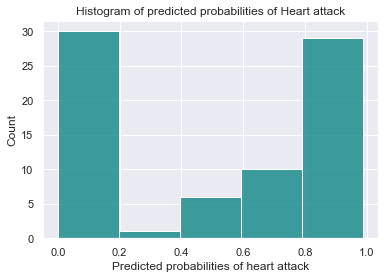

In [23]:
sns.histplot(pred_1, bins= 5, color= 'teal')
plt.title('Histogram of predicted probabilities of Heart attack')
plt.xlabel('Predicted probabilities of heart attack')
plt.show()

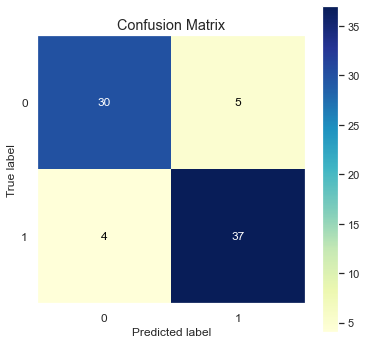

In [24]:
skplt.metrics.plot_confusion_matrix(y_test,pred, figsize=(6,6), cmap= 'YlGnBu');

Number of **False Positives** : 5 <br>
Number of **False Negatives** : 4

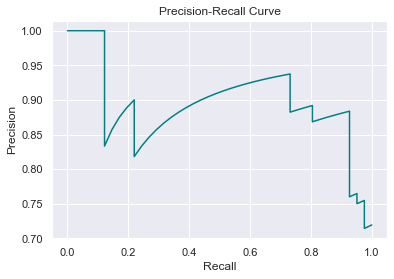

In [25]:
precision, recall, thresholds = precision_recall_curve(y_test, pred_1)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='teal')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

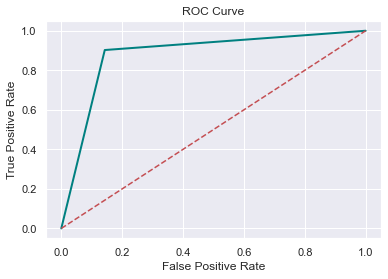

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [27]:
roc_auc = roc_auc_score(y_test, pred_1)
print('ROC AUC Score: {:.2f}'.format(roc_auc))

ROC AUC Score: 0.91


### Conclusion :

ROC AUC score of the model is very close to 1. So, we can conclude that the classifier did a good job in predicting whether a person has high chances of heart attack or not.